# Fixed flavour QCDNUM evolution

This code performs DGLAP evolution with nf=3 (FFNS) using QCDNUM.
First, the library has to be loaded

In [1]:
R__ADD_INCLUDE_PATH(/qcdnumBuild/include/)
R__LOAD_LIBRARY(/qcdnumBuild/lib/libQCDNUM.so)
#pragma cling load("QCDNUM/QCDNUM.h")

Set the constants of the starting PDF, the starting parametrization.

In [2]:
/*
double aq = 0.69876;
double bq = 1.5024;
double cq = 0.44690;
double ag = 0.36781;
double bg = 0;
double cg = 0;
*/

double aq = 1.06;
double bq = 2.3;
double cq = 0.57;
double ag = 0.15;
double bg = 0.00;
double cg = -0.95;


In [3]:
double xf0(double x, double a, double b, double c) {
  double pd = a * pow(x,b) * pow((1-x),c);
  return pd;
}

In [4]:
double func(int* ipdf, double* x) {
  int i = *ipdf;
  double xb = *x;
  double f = 0;
  if(i == 0) f = xf0(xb, ag, bg, cg);
  else if(4 <= i && i <= 6) f = xf0(xb, aq, bq, cq);
  else f = 0;
  return f * exp(-0.01/(1-xb));
}

Evolution by QCDNUM:

In [5]:
  int ityp = 1, iord = 2, nfin = 3;                //unpol, NLO, VFNS
  double q0 = 1.75;
  double as0 = 0.368915, r20 = 1.75;                          //input alphas
  double xmin[] = {9.9e-7, 0.01e0, 0.10e0, 0.40e0, 0.70e0};                                      //x-grid
  int    iwt[] = {1,2,4,8,16}, ng = 5, nxin = 200, iosp = 2;             //x-grid
  int    nqin = 250;                                           //mu2-grid
  double qq[] = { q0, 1600}, wt[] = { 1e0, 1e0};              //mu2-grid
    
  double def[] =                             //input flavour composition
  // tb  bb  cb  sb  ub  db   g   d   u   s   c   b   t
    { 0., 0., 0., 0., 0.,-1., 0., 1., 0., 0., 0., 0., 0.,      // 1=dval
      0., 0., 0., 0.,-1., 0., 0., 0., 1., 0., 0., 0., 0.,      // 2=uval
      0., 0., 0.,-1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,      // 3=sval
      0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,      // 4=dbar
      0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,      // 5=ubar
      0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,      // 6=sbar
      0., 0.,-1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,      // 7=cval
      0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,      // 8=cbar
      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,      // 9=zero
      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,      //10=zero
      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,      //11=zero
      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.};     //12=zero
    
  int nx, nq, id1, id2, nw; double eps;
  int lun = 6 ; string outfile = " ";
  QCDNUM::qcinit(lun,outfile);                              //initialize
  QCDNUM::gxmake(xmin,iwt,ng,nxin,nx,iosp);                     //x-grid
  QCDNUM::gqmake(qq,wt,2,nqin,nq);                            //mu2-grid
  QCDNUM::fillwt(1,id1,id2,nw);                      //calculate weights
  QCDNUM::setord(iord);                                  //LO, NLO, NNLO
  QCDNUM::setalf(as0,r20);                                //input alphas
  QCDNUM::setcbt(nfin,999,999,999);             //thresholds in the VFNS

  int iq0  = QCDNUM::iqfrmq(q0);                           //start scale
  QCDNUM::evolfg(1,func,def,iq0,eps);                 //evolve all pdf's

 
                  ///                                  .().                 
                 (..)                                  (--)                 
  +----------ooO--()--Ooo--------------------------ooO------Ooo---------+   
  |                                                                     |   
  |    #####      ######    ######     ##    ##   ##    ##   ##     ##  |   
  |   ##   ##    ##    ##   ##   ##    ###   ##   ##    ##   ###   ###  |   
  |  ##     ##   ##    ##   ##    ##   ####  ##   ##    ##   #### ####  |   
  |  ##     ##   ##         ##    ##   ## ## ##   ##    ##   ## ### ##  |   
  |  ##     ##   ##         ##    ##   ##  ####   ##    ##   ##  #  ##  |   
  |   ##   ##    ##    ##   ##   ##    ##   ###   ##    ##   ##     ##  |   
  |    #####      ######    ######     ##    ##    ######    ##     ##  |   
  |        ##                                                           |   
  |                                                                     | 

In [6]:
double q = 20;
gG  = new TGraph();
gQ  = new TGraph();
gG0 = new TGraph();
gQ0 = new TGraph();

for(double x = 1e-3; x < 1; x *= 1.01) { //fill the graphs
    double pdf[13];
    QCDNUM::allfxq(1,x,q,pdf,0,1); 
    gG->SetPoint(gG->GetN(), x, pdf[6]);
    gQ->SetPoint(gQ->GetN(), x, pdf[7]);
    QCDNUM::allfxq(1,x,q0,pdf,0,1); 
    gG0->SetPoint(gG0->GetN(), x, pdf[6]);
    gQ0->SetPoint(gQ0->GetN(), x, pdf[7]);
}
TCanvas *can = new TCanvas();
can->SetLogx();

### Gloun PDF at scale 20 GeV2

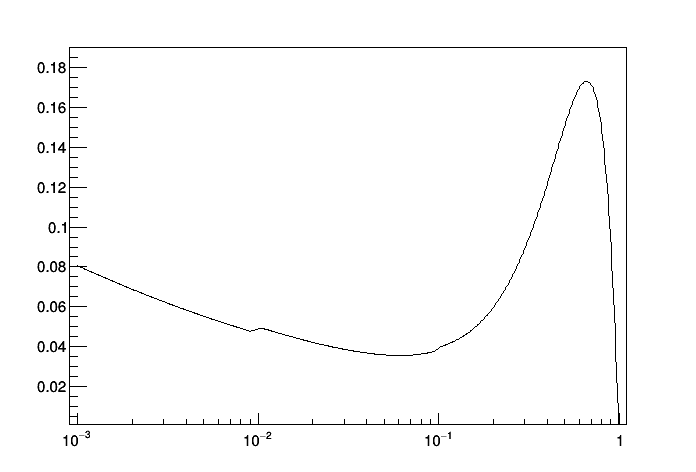

In [7]:
//gG->Draw();
gQ->Draw();
can->Draw();

### Quark PDF at scale 20 GeV2

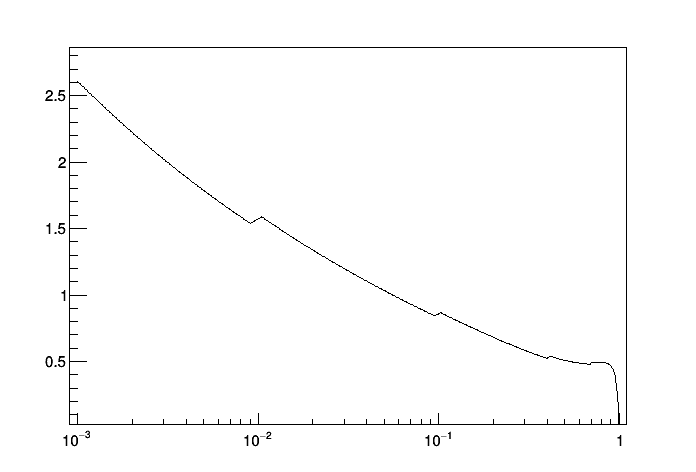

In [8]:
can->Clear();
gG->Draw();
can->Draw();

### Gluon at the starting scale

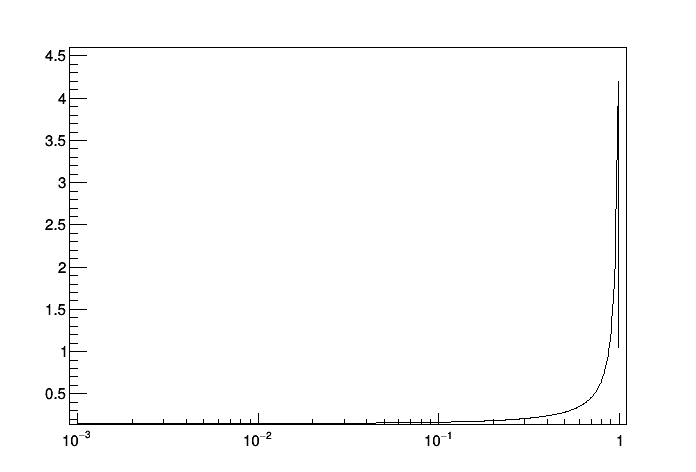

In [9]:
can->Clear();
gG0->Draw();
can->Draw();